In [ ]:
# agglomerative, dbscan시도

In [1]:
import pandas as pd

# 업로드된 파일 로드
file_path = '/Users/sykim/Desktop/과기대/4-1/데이터마이닝/new_2nd_data.xlsx'
data = pd.read_excel(file_path)

# 데이터프레임의 구조를 이해하기 위해 처음 몇 개의 행을 출력
data.head()


,CT_NM,alone_ratio,old_ratio,welfare_ratio,disabled_ratio
0,가락동,0.166186,0.140697,0.029419,0.069014
1,가락본동,0.264853,0.154773,0.059661,0.073950
2,가리봉동,0.388658,0.171422,0.136007,0.110682
3,가산동,0.288088,0.106477,0.095440,0.097566
4,가양동,0.338955,0.183702,0.250216,0.198713


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관 행렬 계산
corr_matrix = data.drop(columns=['CT_NM']).corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of the Variables')
plt.show()

# PCA가 유용한지 확인하기 위해 설명된 분산 계산
from sklearn.decomposition import PCA

# PCA를 위해 'CT_NM' 열 삭제
data_for_pca = data.drop(columns=['CT_NM'])

# PCA fitting
pca = PCA()
pca.fit(data_for_pca)

# 분산
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = explained_variance.cumsum()

# 분산 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

explained_variance_cumulative

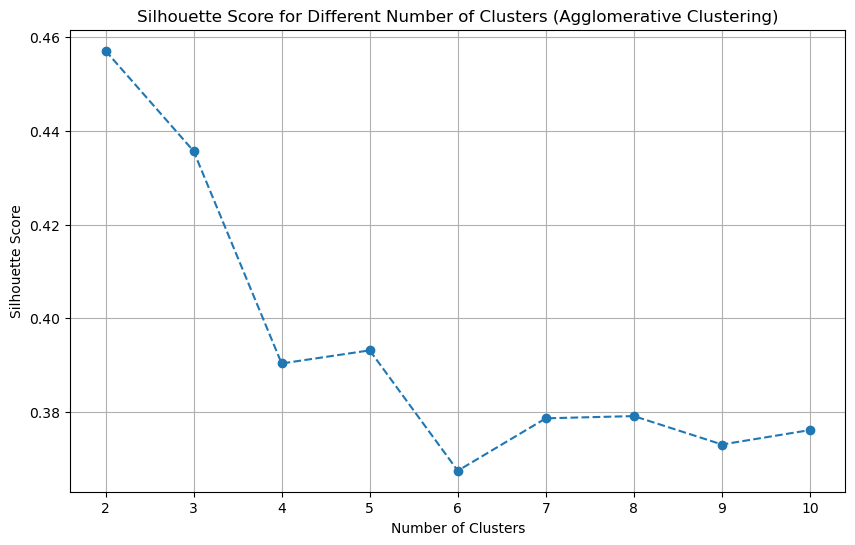

(2, 0.4570781261754657)

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# PCA를 적용하여 주성분을 2개로 줄이기
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_pca)

# 실루엣 점수를 사용하여 최적의 클러스터 수 결정
silhouette_scores = []
range_n_clusters = range(2, 11)  # 2개부터 10개까지의 클러스터 테스트


# 실루엣 점수를 사용하여 Agglomerative Clustering의 최적의 클러스터 수 결정
silhouette_scores_agg = []

# PCA를 적용하여 주성분을 2개로 줄이기
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_pca)


# 실루엣 점수를 사용하여 최적의 클러스터 수 결정
silhouette_scores = []
range_n_clusters = range(2, 11)  # 2개부터 10개까지의 클러스터 테스트

for n_clusters in range_n_clusters:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels_agg = agg_clustering.fit_predict(data_pca)
    silhouette_avg_agg = silhouette_score(data_pca, cluster_labels_agg)
    silhouette_scores_agg.append(silhouette_avg_agg)

# Agglomerative Clustering의 실루엣 점수 그리기
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores_agg, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters (Agglomerative Clustering)')
plt.grid()
plt.show()

# Agglomerative Clustering의 최적의 클러스터 수 찾기
optimal_n_clusters_agg = range_n_clusters[silhouette_scores_agg.index(max(silhouette_scores_agg))]
optimal_n_clusters_agg, max(silhouette_scores_agg)


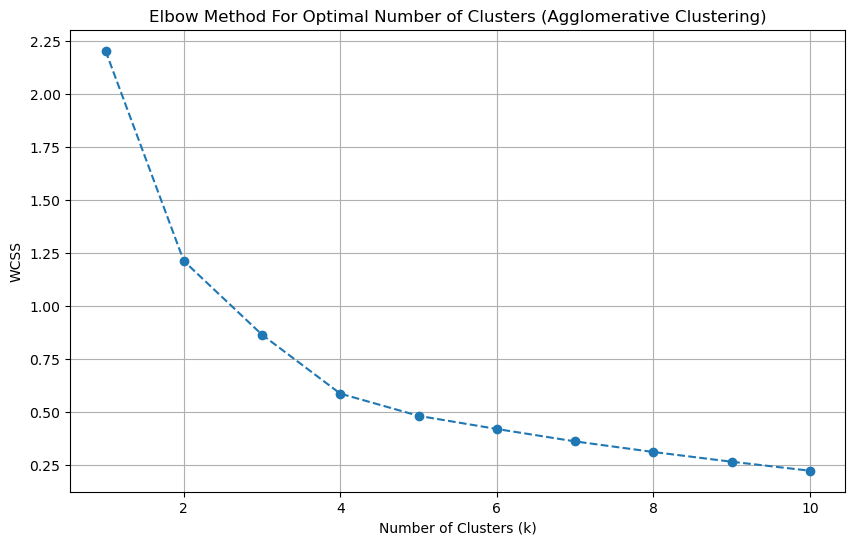

In [11]:
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np
import matplotlib.pyplot as plt

# Agglomerative Clustering을 위한 linkage matrix를 계산
Z = linkage(data_pca, method='ward')

# Agglomerative Clustering에 대한 WCSS (within-cluster sum of squares)를 계산하는 함수
def calculate_wcss_agg(data, Z, max_k):
    wcss = []
    for k in range(1, max_k + 1):
        cluster_labels = fcluster(Z, k, criterion='maxclust')
        centers = []
        for i in range(1, k + 1):
            cluster_points = data[cluster_labels == i]
            center = np.mean(cluster_points, axis=0)
            centers.append(center)
        centers = np.array(centers)
        wcss.append(np.sum([np.sum((data[cluster_labels == j + 1] - centers[j]) ** 2) for j in range(k)]))
    return wcss

# 최대 클러스터 개수를 정의
max_k = 10

# 1부터 max_k까지의 k 값에 대한 WCSS를 계산
wcss_agg = calculate_wcss_agg(data_pca, Z, max_k)

# Agglomerative Clustering에 대한 Elbow Method 그래프
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss_agg, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal Number of Clusters (Agglomerative Clustering)')
plt.grid()
plt.show()


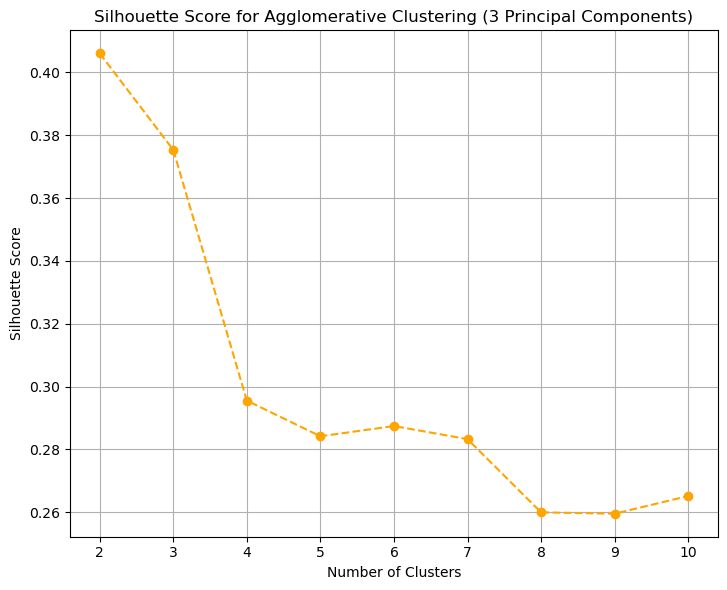

(2, 0.40608474927781923)

In [8]:
# PCA를 적용하여 3개의 주성분으로 차원 축소
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_for_pca)

# Agglomerative Clustering을 위한 실루엣 점수를 사용하여 최적의 클러스터 개수를 결정
silhouette_scores_agg_3d = []

for n_clusters in range_n_clusters:
    
    # Agglomerative 클러스터링
    agg_clustering_3d = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels_agg_3d = agg_clustering_3d.fit_predict(data_pca_3d)
    silhouette_avg_agg_3d = silhouette_score(data_pca_3d, cluster_labels_agg_3d)
    silhouette_scores_agg_3d.append(silhouette_avg_agg_3d)

# Agglomerative Clustering을 위한 실루엣 점수를 3개의 주성분으로 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores_agg_3d, marker='o', linestyle='--', color='orange', label='Agglomerative')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Agglomerative Clustering (3 Principal Components)')
plt.grid()

plt.tight_layout()
plt.show()

# 최적의 클러스터 개수
optimal_n_clusters_agg_3d = range_n_clusters[silhouette_scores_agg_3d.index(max(silhouette_scores_agg_3d))]

optimal_n_clusters_agg_3d, max(silhouette_scores_agg_3d)

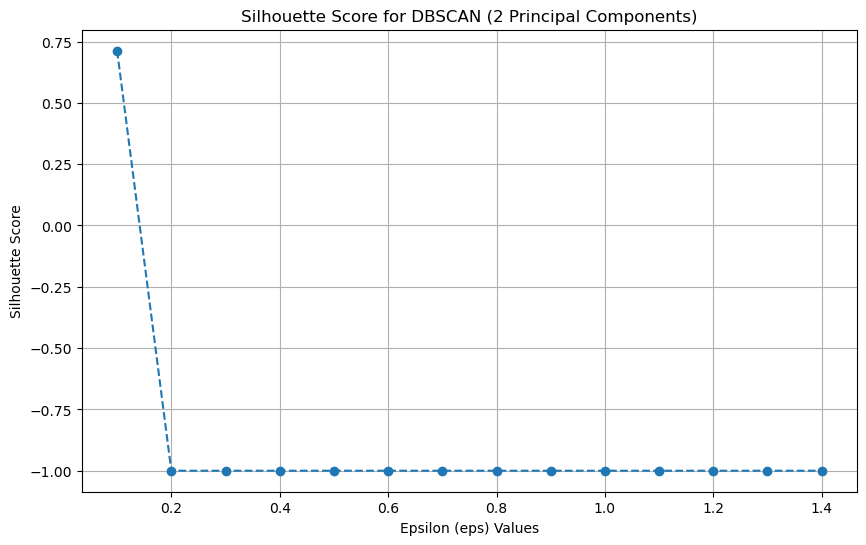

(0.1, 0.7126451385772271)

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# DBSCAN의 실루엣 점수를 다양한 epsilon 값으로 계산하는 함수
def calculate_dbscan_silhouette(data, eps_values, min_samples=5):
    silhouette_scores = []
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(data)
        
         # 실루엣 점수 계산에서 노이즈 포인트를 제외
        if len(set(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(data, cluster_labels)
        else:
            silhouette_avg = -1  # 클러스터링이 실패하면 낮은 점수를 할당
        
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

# 테스트할 epsilon 값의 범위
eps_values = np.arange(0.1, 1.5, 0.1)

# DBSCAN의 실루엣 점수를 계산
silhouette_scores_dbscan = calculate_dbscan_silhouette(data_pca, eps_values)

# DBSCAN의 실루엣 점수를 시각화
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores_dbscan, marker='o', linestyle='--')
plt.xlabel('Epsilon (eps) Values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for DBSCAN (2 Principal Components)')
plt.grid()
plt.show()

# DBSCAN의 최적의 epsilon 값
optimal_eps = eps_values[silhouette_scores_dbscan.index(max(silhouette_scores_dbscan))]
optimal_eps, max(silhouette_scores_dbscan)


In [10]:
import pandas as pd
from sklearn.cluster import DBSCAN

# DBSCAN 클러스터링 적용
dbscan_optimal = DBSCAN(eps=0.1, min_samples=5)
cluster_labels_dbscan_optimal = dbscan_optimal.fit_predict(data_pca)

# 원래 데이터프레임에 클러스터 레이블 추가
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = cluster_labels_dbscan_optimal

# 첫 몇 행을 출력
data_with_clusters.head()

,CT_NM,alone_ratio,old_ratio,welfare_ratio,disabled_ratio,Cluster
0,가락동,0.166186,0.140697,0.029419,0.069014,0
1,가락본동,0.264853,0.154773,0.059661,0.073950,0
2,가리봉동,0.388658,0.171422,0.136007,0.110682,0
3,가산동,0.288088,0.106477,0.095440,0.097566,0
4,가양동,0.338955,0.183702,0.250216,0.198713,0


In [12]:
from sklearn.cluster import AgglomerativeClustering
from IPython.display import display

# Assuming `data_pca` and `data` are already defined

# 원래의 데이터프레임에 클러스터 레이블을 추가
agg_clustering_3_clusters = AgglomerativeClustering(n_clusters=3)
cluster_labels_agg_3 = agg_clustering_3_clusters.fit_predict(data_pca)

# 원래의 데이터프레임에 클러스터 레이블을 추가
data_with_clusters_agg_3 = data.copy()
data_with_clusters_agg_3['Cluster'] = cluster_labels_agg_3

# Display the resulting dataframe
display(data_with_clusters_agg_3)

,CT_NM,alone_ratio,old_ratio,welfare_ratio,disabled_ratio,Cluster
0,가락동,0.166186,0.140697,0.029419,0.069014,0
1,가락본동,0.264853,0.154773,0.059661,0.073950,0
2,가리봉동,0.388658,0.171422,0.136007,0.110682,1
3,가산동,0.288088,0.106477,0.095440,0.097566,0
4,가양동,0.338955,0.183702,0.250216,0.198713,1
...,...,...,...,...,...,...
237,회현동,0.362812,0.253351,0.168556,0.113864,1
238,효창동,0.191260,0.145022,0.034199,0.108037,0
239,후암동,0.293883,0.178920,0.112035,0.109171,1
240,휘경동,0.225776,0.153274,0.056961,0.103819,0


In [ ]:
# 엑셀 파일로 저장
output_file = '/Users/sykim/Downloads/data_with_clusters_agg_3.xlsx'
data_with_clusters_agg_3.to_excel(output_file, index=False)

output_file

In [13]:
# 각 클러스터의 각 특성의 평균 계산
cluster_summary = data_with_clusters_agg_3.groupby('Cluster').mean()

# 엑셀 파일로 저장
summary_file = '/Users/sykim/Downloads/data_with_clusters_agg_3.xlsx'
cluster_summary.to_excel(summary_file)

# 클러스터 요약 출력
cluster_summary

C:\Users\sykim\AppData\Local\Temp\ipykernel_22932\228455719.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = data_with_clusters_agg_3.groupby('Cluster').mean()


,alone_ratio,old_ratio,welfare_ratio,disabled_ratio
Cluster,,,,
0,0.226827,0.162430,0.068191,0.097137
1,0.327230,0.190445,0.122122,0.118280
2,0.542045,0.244515,0.237474,0.151072
